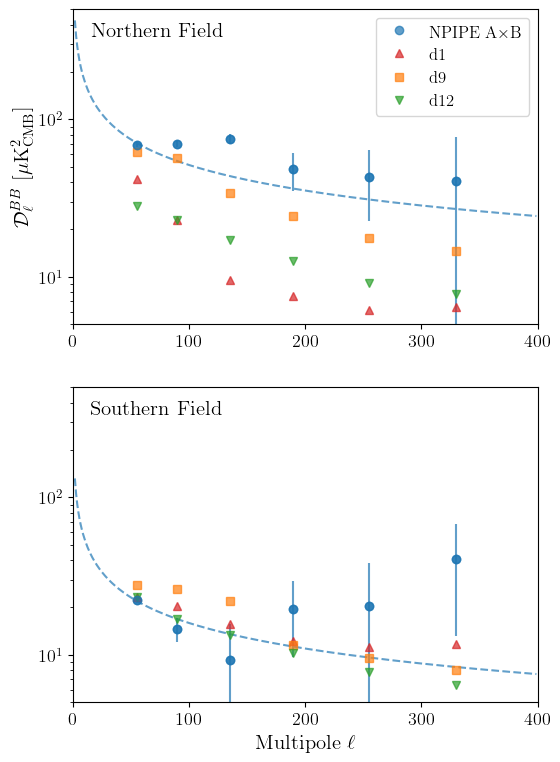

In [1]:
# 20230821:
# Plotting a BB graph of PR4 data split maps and PySM sim maps
# in three selected smallfield
#
# Note: run it in Python2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.legend_handler import HandlerTuple

# Change font globally
#rc('font',**{'family':'serif', 'size': 12})
#rc('font',**{'family':'serif', 'size': 12})
mpl.rc('font',**{'family':'serif'})

# For \text command
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# Show plot
plt.ion()

# m = 10: Northern Galactic - larger amplitude
# m = 720: Near the BK field
fig, axs = plt.subplots(2,1,figsize=(6.0,9.0))

for m in [10,730]:

  if m == 10: 
    idx = 0
  else: 
    idx = 1

  # Real data - Planck PR4 353 GHz detector split
  # Use detector-split because it is truly independent
  #txtname = 'data/smallfield_DS_dl_400sd.txt'
  txtname = 'data/smallfield_DS_dl_400sd_2p54.txt' # 20240913: use the -2.54 data for the PySM paper
  # Get lc, dl and A^BB
  txtarray = np.loadtxt(txtname)
  lc = txtarray[m,0:6]
  dlbb = txtarray[m,18:24]
  varbb = txtarray[m,24:30]
  abb_fit = txtarray[m,30]
  # Plot BB and BB_fit
  ell = np.arange(2,400)
  ell0 = 80.0
  #alpha = -2.42
  alpha = -2.54 # 20240913: use the -2.54 data for the PySM paper
  p1, = axs[idx].plot(ell,abb_fit*(ell/ell0)**(alpha+2),'--',color='tab:blue',alpha=0.7)
  p2, = axs[idx].plot(lc, dlbb,'o',color='tab:blue',alpha=0.7)
  axs[idx].errorbar(lc, dlbb, yerr=np.sqrt(varbb),fmt='o',color='tab:blue',alpha=0.7)

  # D1 model
  txtname = 'data/pysm_3p4p0b9/smallfield_d1_dl_400sd.txt'
  txtarray = np.loadtxt(txtname)
  lc = txtarray[m,0:6]
  dlbb = txtarray[m,18:24]
  # Plot BB again
  p3, = axs[idx].plot(lc, dlbb, '^', color='tab:red',alpha=0.7)

  # D9 model
  txtname = 'data/pysm_3p4p0b9/smallfield_d9_dl_400sd.txt'
  txtarray = np.loadtxt(txtname)
  lc = txtarray[m,0:6]
  dlbb = txtarray[m,18:24]
  # Plot BB again
  p4, = axs[idx].plot(lc, dlbb, 's', color='tab:orange',alpha=0.7)

  # D12 model
  txtname = 'data/pysm_3p4p0b9/smallfield_d12_dl_400sd.txt'
  txtarray = np.loadtxt(txtname)
  lc = txtarray[m,0:6]
  dlbb = txtarray[m,18:24]
  # Plot BB again
  p5, = axs[idx].plot(lc, dlbb, 'v', color='tab:green',alpha=0.7)

# Plotting format
axs[0].set_xlim((0, 400))
axs[1].set_xlim((0, 400))

axs[0].set_xticks(np.arange(0, 450, step=100))
axs[1].set_xticks(np.arange(0, 450, step=100))

axs[0].set_ylim((5e0, 5e2))
axs[1].set_ylim((5e0, 5e2))

axs[0].set_yscale("log")
axs[1].set_yscale("log")

axs[0].xaxis.set_tick_params(direction="out",which="both",labelsize=13)
axs[0].yaxis.set_tick_params(direction="out",which="both",labelsize=13)
axs[1].xaxis.set_tick_params(direction="out",which="both",labelsize=13)
axs[1].yaxis.set_tick_params(direction="out",which="both",labelsize=13)

axs[0].set_ylabel('$\mathcal{D}_\ell^{BB}$ [$\mu \mathrm{K^2_{CMB}}$]',fontsize=15)
axs[1].set_xlabel('Multipole $\ell$',fontsize=15)

axs[0].legend([p2,p3,p4,p5],[r'NPIPE A$\times$B', 'd1', 'd9', 'd12'],fontsize=12)
axs[0].text(.04, .96, 'Northern Field', ha='left', va='top', transform=axs[0].transAxes, fontsize=15)
axs[1].text(.04, .96, 'Southern Field', ha='left', va='top', transform=axs[1].transAxes, fontsize=15)

plt.savefig('smallfield_power.pdf',bbox_inches='tight')